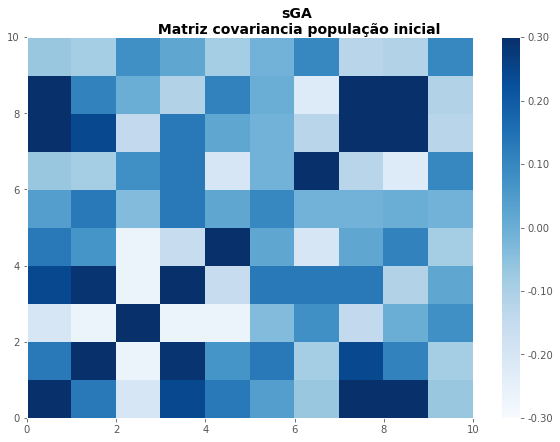

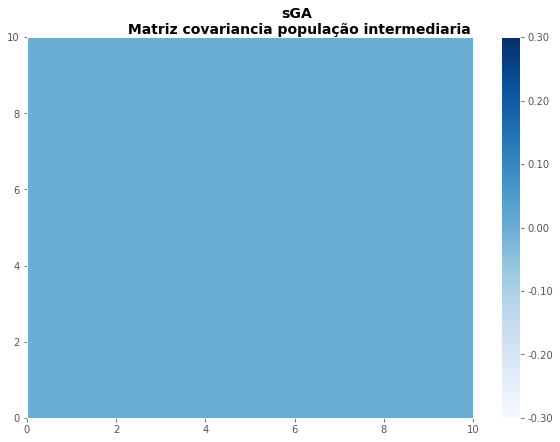

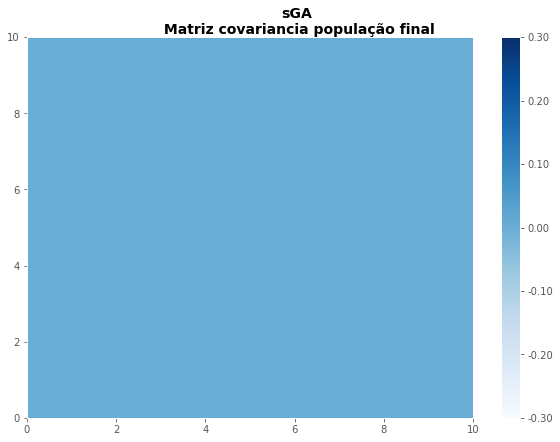

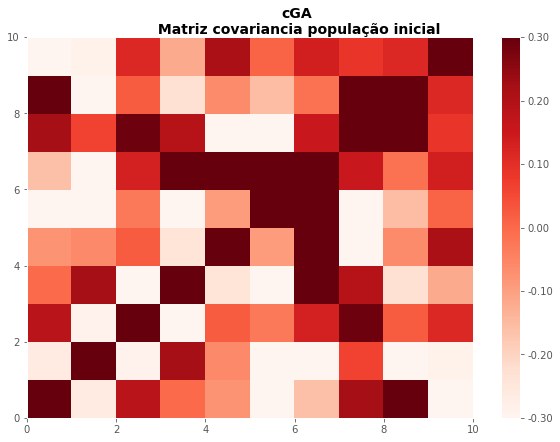

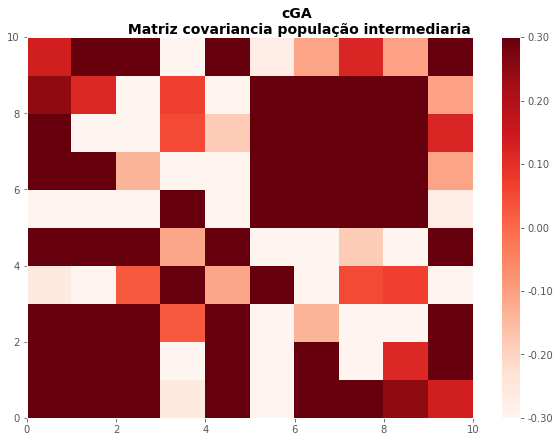

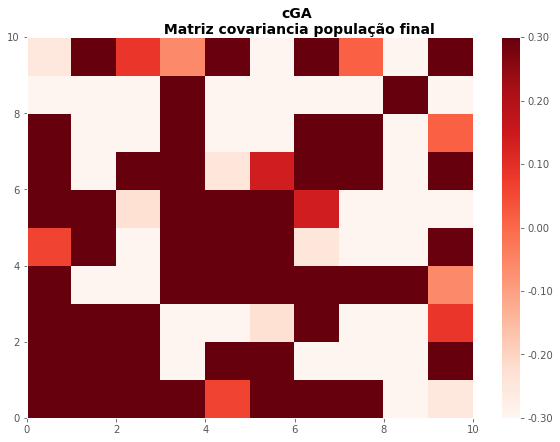

In [2]:
## ALGORITMO GENETICO COMPACTO POP COMPLETA e SIMPLES REAL MATRIZ DE COVARIANCIA
import random
import numpy as np
import array as arr
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import statistics
from scipy.stats import norm
plt.style.use('ggplot')

mc_cga = {}
mc_sga = {}

###################          SGA        ###################

def generate_pop_sga(size,population_size):
    pop=[]

    for n in range(population_size):
      value = np.random.normal(0, 1, size )
      pop.append( {'val':value,'fit':0} )
    
    return pop

def crossover_sga(size,population,mutation):
    son = population[0].copy()
    son2 = population[1].copy()

    s = arr.array('f', son['val'])
    s2 = arr.array('f', son2['val'])    
    middle = random.randrange(1,size-1)

    
    son['fit'] = 0
    son2['fit'] = 0
    
    son['val'] = s[:middle] + s2[middle:]
    son2['val'] = s2[:middle] + s[middle:]
    
    # mutation
    child = son['val']
    child2 = son2['val']

    c1 = []
    for c in child:
      mut = random.random()
      if(mut < mutation):
        c1.append(random.random())
      else:
        c1.append(c)
    son['val'] = c1

    c2 = []
    for s in child2:
      mut = random.random()
      if(mut < mutation):
        c2.append(random.random())
      else:
        c2.append(s)
    son2['val'] = c2


    return son,son2

def to_Int(individuo):
  l = []
  for i in individuo:
    if i == "1":
      l.append(1)
    else:
      l.append(0)
  return sum(l)

def matriz_covariancia(pop,name):
    n = []
    for i in pop:
      m = []
      for j in i['val']:
        m.append(int(j))
      n.append(m)

    mts = np.transpose(n)
    #print(mts)
    mc_sga[name] = np.cov(mts)

def run_sga(generations, size, population_size):
    # criação da população aleatoria
    population = generate_pop_sga(size,population_size)
    population = fitness_function_sga(population)

    matriz_covariancia(population,'inicial')
    mutation = 0.01

    # percorre as gerações
    for i in range(generations):

      mid = int(population_size/2) if int(population_size/2) % 2 == 0 else int(population_size/2)-1
      new_population = []
      
      for j in range(0,mid,2):
        new_population += crossover_sga(size,population[j:j+2],mutation)
        #print(j,new_population)

      full_pop = population + new_population
      full_pop = fitness_function_sga(full_pop)

      population = full_pop[:population_size]
      if i == int(generations/2):
        matriz_covariancia(population,'intermediaria')
      #print ("generation: {} and population {}".format(i + 1,population))
    matriz_covariancia(population,'final')  
  

def sort_fit(e):
  return e['fit']

# funcao de fitness
def fitness_function_sga(population):
  fit = []
  for p in population:
    #print(p['val'])
    soma = 0
    for v in p['val']:
      soma+= v ** 2
    p['fit']= soma*-1
    fit.append(p)

  fit.sort(reverse = True,key=sort_fit)
  
  return fit

###################          CGA        ###################

def generate_candidate(vector,population_size):
    pop=[]

    medias = vector[0]
    desvios = vector[1]
    if medias[0] == 0:
      for n in range(population_size):
        value = np.random.normal(0, 1, len(medias) )
        pop.append( value )
    else:
      for m in range(population_size ):
        value = np.random.normal(medias[m], desvios[m], len(medias) )
        pop.append( value )

    #print(pop)
    
    return pop

def generate_vector(size):
    return [[0.0] * size, [1] * size]

def compete(a, b):
    if a[1] > b[1]:
        return a, b
    else:
        return b, a

def competition(population):
    for n in range(1,len(population)):
      winner,loser = compete(population[0],population[n])
    return winner, loser

def update_vector(vector, winner, loser, population_size,pop,size):
    win = winner[0]
    los = loser[0]
    vM = vector[0]
    vD = vector[1]

    for i in range(size):
      vecMed = []
      for p in pop:
        v = p[0]
        vecMed.append(v[i])
      
      if win[i] != los[i]:
        vM[i] = statistics.mean(vecMed)
        vD[i] = statistics.stdev(vecMed)

def matriz_covariancia_cga(pop,name):
    n = []
    for i in pop:
      m = []
      for j in i[0]:
        m.append(j)
      n.append(m)
    
    mts = np.transpose(n)
    mc_cga[name] = np.cov(mts)

def run_cga(generations, size, population_size):
    # probabilidade do vetor
    vector = generate_vector(size)
    best = None
    for i in range(generations):
      population = generate_candidate(vector, population_size)
      population = fitness_function(population)
      population = sortedMax(population)
      
      if i == 0:
        matriz_covariancia_cga(population,'inicial')
      winner, loser = competition(population)
      
      # verifica qual é o melhor
      if best:
          if winner[1] > best[1]:
             best = winner
      else:
          best = winner

      update_vector(vector,winner,loser,population_size,population,size)

      if i == int(generations/2):
        matriz_covariancia_cga(population,'intermediaria')

      
      #print ("generation: {} best value: {} best fitness: {}".format(i + 1, best[0], best[1] ) )
    matriz_covariancia_cga(population,'final')

def sortedMax(pop):
  pop = sorted(pop, key=lambda p: p[1])
  #print(pop)
  return pop

def fitness_function(value):
  pop = []
  #print(value)
  for n in value:
    soma = 0
    for m in n:
      soma+= m ** 2
    pop.append([n,soma*-1])
  return pop

def fmt(x, pos):
  return r'{:.2f}'.format(x)

def plotgraphics_sga(name):
  hmmin, hmmax = -0.3, 0.3

  fig, axis = plt.subplots(figsize=(10, 7))
  fig.suptitle('sGA\n Matriz covariancia população '+name,
  fontsize=14, fontweight='bold', y=0.94)
  heatmap = axis.pcolor(mc_sga[name], vmin=hmmin, vmax=hmmax, cmap=plt.cm.Blues)
  plt.colorbar(heatmap, format=ticker.FuncFormatter(fmt))
  plt.show()

def plotgraphics_cga(name):
  hmmin, hmmax = -0.3, 0.3

  fig, axis = plt.subplots(figsize=(10, 7))
  fig.suptitle('cGA\n Matriz covariancia população '+name,
  fontsize=14, fontweight='bold', y=0.94)
  heatmap = axis.pcolor(mc_cga[name], vmin=hmmin, vmax=hmmax, cmap=plt.cm.Reds)
  plt.colorbar(heatmap, format=ticker.FuncFormatter(fmt))
  plt.show()
  

run_sga(10, 10, 10)
run_cga(10, 10, 10)
plotgraphics_sga('inicial')
plotgraphics_sga('intermediaria')
plotgraphics_sga('final')
plotgraphics_cga('inicial')
plotgraphics_cga('intermediaria')
plotgraphics_cga('final')